In [266]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [267]:
from pandas import *
import random

In [268]:
#This block of code defines the varibales for the simulation. There are three different classes of bacteria and two behavior sets. 
#These are then appended to list_of_Values() which is handed to the classes during intialiization and define_variables functions. 
#These values should be changed from 0-1. 0.9 being a 10% chance of an action occuring. 

list_of_values=list()
Suscestible_Replication_Rate = 0.65
Suscestible_Mutation_Rate = 0.91
Suscestible_Death_Rate = 0.91
AntiB_Suscestible_Replication_Rate = 0.90
AntiB_Suscestible_Mutation_Rate = 0.85
AntiB_Suscestible_Death_Rate = 0.3
list_of_values.append(Suscestible_Replication_Rate)
list_of_values.append(Suscestible_Mutation_Rate)
list_of_values.append(Suscestible_Death_Rate)
list_of_values.append(AntiB_Suscestible_Replication_Rate)
list_of_values.append(AntiB_Suscestible_Mutation_Rate)
list_of_values.append(AntiB_Suscestible_Death_Rate)

 
    
Intermediate_Replication_Rate = 0.85
Intermediate_Mutation_Rate = 0.91
Intermediate_Death_Rate = 0.91
Intermediate_Horizontal_Gene_Transfer_Rate = .99
AntiB_Intermediate_Replication_Rate = 0.78
AntiB_Intermediate_Mutation_Rate = 0.85
AntiB_Intermediate_Death_Rate = 0.6
AntiB_Intermediate_Horizontal_Gene_Transfer_Rate = .76
list_of_values.append(Intermediate_Replication_Rate)
list_of_values.append(Intermediate_Mutation_Rate)
list_of_values.append(Intermediate_Death_Rate)
list_of_values.append(Intermediate_Horizontal_Gene_Transfer_Rate)
list_of_values.append(AntiB_Intermediate_Replication_Rate)
list_of_values.append(AntiB_Intermediate_Mutation_Rate)
list_of_values.append(AntiB_Intermediate_Death_Rate)
list_of_values.append(AntiB_Intermediate_Horizontal_Gene_Transfer_Rate)
  
Resistant_Replication_Rate = 0.95
Resistant_Death_Rate = 0.91
Resistant_Horizontal_Gene_Transfer_Rate = .99
AntiB_Resistant_Replication_Rate = 0.90
AntiB_Resistant_Death_Rate = 0.91
AntiB_Resistant_Horizontal_Gene_Transfer_Rate = .96
list_of_values.append(Resistant_Replication_Rate)
list_of_values.append(Resistant_Death_Rate)
list_of_values.append(Resistant_Horizontal_Gene_Transfer_Rate)
list_of_values.append(AntiB_Resistant_Replication_Rate)
list_of_values.append(AntiB_Resistant_Death_Rate)
list_of_values.append(AntiB_Resistant_Horizontal_Gene_Transfer_Rate)

print list_of_values

[0.65, 0.91, 0.91, 0.9, 0.85, 0.3, 0.85, 0.91, 0.91, 0.99, 0.78, 0.85, 0.6, 0.76, 0.95, 0.91, 0.99, 0.9, 0.91, 0.96]


After list_of_values() is defined, the three classes are defined including several functions. The Suceptible class is the
parent class. All behaviors are then inherited to the two children classes Intermediate, and Resistant. All of the classes have similar functions and are handed over and called similarly, however the content and behavior of those functions vary slightly. This includes Intermediate and Resistant having a different state etc.. The define variables function is where behvaior for the event (AntiBiotic) is set. Once this state is changed to True the define variables function will then define the antibiotic behaviors. You will also notice that dieing is setting agents state to 4. This is an undefined state which is not referenced in graphing and imagining and does not influence any of the other agent's behavior therefore in effect is "killing" the bacteria. The following three blocks of code therefore define our classes, define which behavior is to be inheritied and then define which beahvior is to be set the without antibiotic rate of change or the with antibiotic rate of change. 



In [279]:
# Susceptible will be more suceptible to antibiotic this class which is the parent class of intermediate and resistant will
# first define its values, then move around, mutate, and die. There is also a transfer fucntion which enables us to call 
# all of the behaviors at the same time but this is an inherited class beahvior so here it is marked as pass. 

class Susceptible():
    def __init__(self,area,location_x,location_y,list_of_values,state,self_death):
        self.state=1
        self.x=location_x
        self.y=location_y
        area[self.x][self.y]=self
        self.antibiotic_added = state
        self.self_death=self_death
         
    def define_variables(self,list_of_values):
        if self.antibiotic_added == False:
            if (random.uniform(0,1)>list_of_values[0]):
                self.replication_rate = True
            else: self.replication_rate = False 
        

            if (random.uniform(0,1)>list_of_values[1]): 
                self.mutation_rate = True 
            else: self.mutation_rate = False  
        
            if (random.uniform(0,1)>list_of_values[2]):
                self.death_rate = True 
            else: self.death_rate = False
     
        else: 
            if (random.uniform(0,1)>list_of_values[3]):
                self.replication_rate = True
            else: self.replication_rate = False
            
            if (random.uniform(0,1)>list_of_values[4]): 
                self.mutation_rate = True 
            else: self.mutation_rate = False  
      
            if (random.uniform(0,1)>list_of_values[5]):
                self.death_rate = True 
            else: self.death_rate = False     
       
    #This function looks for a surronding area if that area is not taken then it will populate that new area
    def move_around(self,area):
        if self.state != 4:
            xOffset=[0,1,0,-1]
            yOffset=[-1,0,1,0]
            direction=random.randint(0,3)
            tx=self.x+xOffset[direction]
            ty=self.y+yOffset[direction]
       
            if tx<0 or ty<0 or tx>(len(area)-1) or ty>(len(area[0])-1):
                pass
            else: 
                if area[tx][ty]==None:
                    area[self.x][self.y]=None
                    self.x=tx
                    self.y=ty
                    area[self.x][self.y]=self
    #This function looks for a surronding area similar to move_around, but if it is empty it will populate that new area with 
    # a Suceptible bacteria, which is being intialized here and appended to Bacteria__Total which has all of the Bacteria that are
    # behaving within the grid. Also notice that we are outside of the area (grid). 
    def replicate(self,area):
        if self.state != 4:
            xOffset=[0,1,0,-1]
            yOffset=[-1,0,1,0]
            direction=random.randint(0,3)
            tx=self.x+xOffset[direction]
            ty=self.y+yOffset[direction]
            if tx<0 or ty<0 or tx>(len(area)-1) or ty>(len(area[0])-1):
                pass
            else: 
                if (self.replication_rate == True):
                    if (area[tx][ty]== None):
                        S_Bacteria2=Susceptible((area),(tx),(ty),(list_of_values),(self.antibiotic_added),(False))
                        Bacteria_Total.append(S_Bacteria2)
                    else: 
                        pass
    #Mutate simply has a chance to move to another class. This function sets the agent's class to 4 effectively "killing" it
    #then a new Intermediate bacteria is made. For the purpose of this simulation it is assumed that mutation is step-wise.
    #self.oldstate is used later in the program in order to keep an accurate count of the Bacteria.
    def mutate(self,area):
        if self.state != 4:
            if (self.mutation_rate == True):
                self_x2=self.x
                self_y2=self.y
                self.oldstate = self.state
                area[self.x][self.y]=None
                self.state=4
                S_Bacteria_3=(Intermediate((area),(self_x2),(self_y2),(list_of_values),(self.antibiotic_added),(False)))
                Bacteria_Total.append(S_Bacteria_3)
        
            else:
                pass
    #Here this function is simply pass - this is in order to ensure that all the classes have similar functions to be called
    # at the same time, however in the following classes you will see actual code that simulates horiztonal gene transfer
    def transfer(self,area):
        pass 
    
    #Sets the self.state of the bacteria to 4, which is then ignored throughout the code. 
    def die(self,area):
        if (self.death_rate == True):
            self.oldstate = self.state
            self.state = 4
            area[self.x][self.y]=None
            self.self_death == True
        else:
            pass 
    #Changes antibiotic state - This is then marked as self in-order to be tracked throughout the progress of the simulation
    #the bahvior changes are then set in define variables section of the code
    def antibiotic_state(self):
        self.antibiotic_added = True 
        
    

In [280]:
class Intermediate (Susceptible):
    #Similar to the above anything that is inherited is only written above in the Parent class. The others have slight changes, 
    #such as the self.state is now 2 here also replicate function makes another intermediate
    # Also there transfer function, now has a funciton. 
    def __init__(self,area,location_x,location_y,list_of_values,state,self_death):
        self.state=2
        self.x=location_x
        self.y=location_y
        area[self.x][self.y]=self
        self.antibiotic_added = state
        self.self_death=self_death
        
    def define_variables(self,list_of_values):
        
        if self.antibiotic_added == False:
            if (random.uniform(0,1)>list_of_values[6]):
                self.replication_rate = True
            else: self.replication_rate = False 

            if (random.uniform(0,1)>list_of_values[7]): 
                self.mutation_rate = True 
            else: self.mutation_rate = False  
        
            if (random.uniform(0,1)>list_of_values[8]):
                self.death_rate = True 
            else: self.death_rate = False
            
            if (random.uniform(0,1)>list_of_values[9]): 
                self.hgt_mutation_rate = True
            else: self.hgt_mutation_rate = False  
        
        else: 
            if (random.uniform(0,1)>list_of_values[10]):
                self.replication_rate = True
            else: self.replication_rate = False  
        
            if (random.uniform(0,1)>list_of_values[11]): 
                self.mutation_rate = True
            else: self.mutation_rate = False  

            if (random.uniform(0,1)>list_of_values[12]):
                self.death_rate = True 
            else: self.death_rate = False
            
            if (random.uniform(0,1)>list_of_values[13]): 
                self.hgt_mutation_rate = True 
            else: self.hgt_mutation_rate = False  
            
            
    #The only differences in the next two functions are the Replicate fucntion makes another 
    #Intermediate Bacteria and mutate produces a Resistant Bacteria
    
    def replicate(self,area):
        if self.state !=4:
            xOffset=[0,1,0,-1]
            yOffset=[-1,0,1,0]
            direction=random.randint(0,3)
            tx=self.x+xOffset[direction]
            ty=self.y+yOffset[direction]
            if tx<0 or ty<0 or tx>(len(area)-1) or ty>(len(area[0])-1):
                pass
            else: 
                if (self.replication_rate == True):
                    if (area[tx][ty]== None):
                        I_Bacteria2=Intermediate((area),(tx),(ty),(list_of_values),(self.antibiotic_added),(False))
                        Bacteria_Total.append(I_Bacteria2)
                else: 
                    pass
    
    def mutate(self,area):
        if self.state !=4:
            if (self.mutation_rate == True):
                self_x2=self.x
                self_y2=self.y
                area[self.x][self.y]=None
                self.state=4
                I_Bacteria_3=Resistant((area),(self_x2),(self_y2),(list_of_values),(self.antibiotic_added),(False))
                Bacteria_Total.append(I_Bacteria_3)
                
    #This code simulates horizontal gene transfer - This code, similar to replicate, looks around it but if the area is occupied
    #by an organism of self.state == 1. This then sets that orangism to self.state 4, again this is ignored throughout the program.
    #The area is then set to none and an Intermediate class is made and placed in that area - similar to the replicate function.
    
    def transfer(self,area):
        if self.state !=4:
            xOffset=[0,1,0,-1]
            yOffset=[-1,0,1,0]
            direction=random.randint(0,3)
            tx=self.x+xOffset[direction]
            ty=self.y+yOffset[direction]
            if tx<0 or ty<0 or tx>(len(area)-1) or ty>(len(area[0])-1):
                pass
            else:
                if (area[tx][ty]!=None):
                    if (area[tx][ty].state==1): #susceptible bacteria  
                        if (self.hgt_mutation_rate == True):
                            area[tx][ty].oldstate = self.state
                            area[tx][ty].state=4
                            area[tx][ty]=None
                            I_Bacteria_4=Intermediate((area),(tx),(ty),(list_of_values),(self.antibiotic_added),(False))
                            Bacteria_Total.append(I_Bacteria_4)
  

In [281]:
class Resistant(Susceptible): 
     #Resistant mutant here initailizes with 3 and can transfer its state to intermediate or susceptible class    
    def __init__(self,area,location_x,location_y,list_of_values,state,self_death):
        self.state=3
        self.x=location_x
        self.y=location_y
        area[self.x][self.y]=self
        self.antibiotic_added = state
        self.self_death=self_death
        
    def define_variables(self,list_of_values):
        
        if self.antibiotic_added == False:
            if (random.uniform(0,1)>list_of_values[14]):
                self.replication_rate = True
            else: self.replication_rate = False   
        
            if (random.uniform(0,1)>list_of_values[15]):
                self.death_rate = True
            else: self.death_rate = False
            
            if (random.uniform(0,1)>list_of_values[16]): 
                self.hgt_mutation_rate = True 
            else: self.hgt_mutation_rate = False  
        
        else: 
            if (random.uniform(0,1)>list_of_values[17]):
                self.replication_rate = True
            else: self.replication_rate = False  

            if (random.uniform(0,1)>list_of_values[18]):
                self.death_rate = True 
            else: self.death_rate = False
            
            if (random.uniform(0,1)>list_of_values[19]): 
                self.hgt_mutation_rate = True 
            else: self.hgt_mutation_rate = False  
    
    
    def replicate(self,area):
        if self.state != 4:
            xOffset=[0,1,0,-1]
            yOffset=[-1,0,1,0]
            direction=random.randint(0,3)
            tx=self.x+xOffset[direction]
            ty=self.y+yOffset[direction]
            if tx<0 or ty<0 or tx>(len(area)-1) or ty>(len(area[0])-1):
                pass
            else: 
                if (self.replication_rate == True):
                    if (area[tx][ty]== None):
                        R_Bacteria2=Resistant((area),(tx),(ty),(list_of_values),(self.antibiotic_added),(False))
                        Bacteria_Total.append(R_Bacteria2)
                    else: 
                        pass
    #Resistant mutants are assumed to be the last part of the mutation therefore, there is no mutations moving it to another
    #state
    def mutate(self,area):
        pass
    # Resistant mutates can also effect Intermediate class.  
    def transfer(self,area):
        if self.state != 4:
            xOffset=[0,1,0,-1]
            yOffset=[-1,0,1,0]
            direction=random.randint(0,3)
            tx=self.x+xOffset[direction]
            ty=self.y+yOffset[direction]
            if tx<0 or ty<0 or tx>len(area)-1 or ty>len(area[0])-1:
                pass
            else:
                if (area[tx][ty]!=None):
                    if (area[tx][ty].state==1): #susceptible bacteria  
                        if (self.hgt_mutation_rate == True):
                            area[tx][ty].oldstate=area[tx][ty].state
                            area[tx][ty].state = 4
                            area[tx][ty]=None
                            R_Bacteria_3=Resistant((area),(tx),(ty),(list_of_values),(self.antibiotic_added),(False))
                            Bacteria_Total.append(R_Bacteria_3)
                    if (area[tx][ty].state==2): #intermediate bacteria  
                        if (self.hgt_mutation_rate == True):
                            area[tx][ty].oldstate=area[tx][ty].state
                            area[tx][ty].state=4
                            area[tx][ty]=None
                            R_Bacteria_4=Resistant((area),(tx),(ty),(list_of_values),(self.antibiotic_added),(False))
                            Bacteria_Total.append(R_Bacteria_4)            

In [345]:
#Creating Area for Which the Bacteria will be in. XDim and YDim are the demensions of the area and the density 
#for each of the different Bacteria are defined below. Below we fill all of the spots with the None. 
xDim=100
yDim=100

density_s=0.1
density_i=0.1
density_r=0.1        
area=list()
#image=list()

for x in range(xDim):  
    area.append(list())
    for y in range(yDim):
        area[x].append(None)


In [346]:
#This fucntion allows us to assign a random location to each of the different intialization steps. Here we create a 
# list with the demensions XDim and YDim we shuffle that list and pick a spot if there is an organism there we move to the 
#next combination of X and Y points. If it runs through the entire list it comes with an except where it will then re-run the shuffling
#of the X and Y of the list. This was done to increase the speed when populating a largely dense grid. Before I used random.int
# for X and Y and when the grid was densely populated it would be very difficult to find an empty spot while trying random locations
#each time. 
def get_random_location(area,xDim,yDim):
    tempListX=list()
    tempListY=list()
    for t in range(int(xDim-1)):
        tempListX.append(t+1)
    for t in range(int(yDim-1)):
        tempListY.append(t+1)
    random.shuffle(tempListX)
    random.shuffle(tempListY)
    x=0
    y=0
    self_x=tempListX[x]
    self_y=tempListY[y] 
    while (area[self_x][self_y])!= None:
        try:
            while (area[self_x][self_y])!= None:
                x=x+1
                self_x=tempListX[x]
                y=y+1
                self_y=tempListY[y]
        except IndexError:
            random.shuffle(tempListX)
            random.shuffle(tempListY)
            x=0
            y=0
            self_x=tempListX[x]
            self_y=tempListY[y]
    return self_x,self_y

Below is the intialization of the program. We have a Bacteria_Total list(). Also a for loop for each class of Bacteria. The 
get_random_location function is called and a random  empty X and Y are returned; these are then put into the intialization of the Bacteria. Then this Bacterium is appended to the Bacteria_Total list. Also, False is given for the parameter State - meaning that there is no antibiotic added and when the define_variables fucntion is called it will assign the first set of behaviors to each of the different Bacteria that have been intialized. 

In [317]:
#Intialization 
Bacteria_Total=list()
for a in range(int(xDim*yDim*density_s)):
    (location_x),(location_y)=(get_random_location(area,xDim,yDim))
    S_Bacteria=Susceptible((area),(location_x),(location_y),(list_of_values),(False),(False))
    Bacteria_Total.append(S_Bacteria)
for a in range(int(xDim*yDim*density_i)):
    (location_x),(location_y)=(get_random_location(area,xDim,yDim))
    I_Bacteria=Intermediate((area),(location_x),(location_y),(list_of_values),(False),(False))
    Bacteria_Total.append(I_Bacteria)
for a in range(int(xDim*yDim*density_r)):
    (location_x),(location_y)=(get_random_location(area,xDim,yDim))
    R_Bacteria=Resistant((area),(location_x),(location_y),(list_of_values),(False),(False))
    Bacteria_Total.append(R_Bacteria)

Several different things are occuring in the code block below. There is a Data, Image and Count list - these are used to count
each of the Bacterium after the program is run with the different attributes. The behaviors are set under the while loop. 
We used While i > 0 convention in order to accomidate new organisms that are being appended to Bacteria_Total during the loop (i.e with the replicate or mutate functions). Therefore when an organism is created it is also included in that round of behaviors. Finally we use the below convention to plot each of the  populations overtime and demonstrate a grid of the final behavior. 

To test each of the different functions for each class - i commented out the code that wasn't being tested. I set each of the parameters (i.e. replicate) to true and then tested to see if there was the desired effect. To test if behavior was changed after antibiotic was added I set parameters to False after antibiotic was added (in the define variables function) and saw if behavior changed after the effect was made. All of the functions for each of the classes were eventually sucessful. This work is not shown here. 

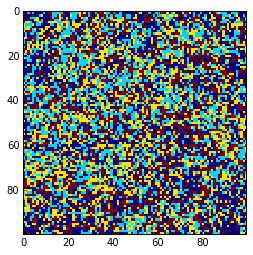

In [323]:
# We are testing what the behavior of the three different bacteria are over the course of time without the presence of the
#antibiotic 
data=[[],[],[],[],[]]
image=[]
for x in range(xDim):
    image.append(list())
    for y in range(yDim):
        image[x].append(0)

#Here is how many rounds of behavior are occuring the If statement below defines when an antibiotic occurs in the system. 
for t in range(100):
    #if t == 50 :
        #for B in Bacteria_Total:
            #B.antibiotic_state()
    count=[0,0,0,0,0]
    i=len(Bacteria_Total)-1
    while i > 0:
        Bacteria_Total[i].define_variables(list_of_values)
        Bacteria_Total[i].move_around(area)
        Bacteria_Total[i].replicate(area)
        Bacteria_Total[i].mutate(area)
        Bacteria_Total[i].transfer(area)
        Bacteria_Total[i].die(area)
        count[Bacteria_Total[i].state]=(count[Bacteria_Total[i].state])+1
        #This bit of code is import in order to subtract bacteria from the count list which are being removed from the grid.
        if Bacteria_Total[i].state != 4:
            try: 
                count[Bacteria_Total[i].oldstate]=count[Bacteria_Total[i].oldstate]-1 
            except AttributeError: 
                    pass 
        i=(i-1)
   
    for x in range(4):
        data[x].append(count[x])
        


for B in Bacteria_Total:
        if B.state != (4):
            image[B.x][B.y]=B.state
    
figure()
imshow(image,interpolation='nearest')

        
    

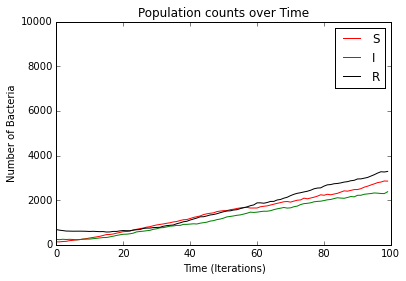

In [327]:
#Below is plottin of the data that was generated above.. 
for x in [0,1,2,3]:
    if x == 1:
        plot(data[1], 'r', label= Susceptible)
    if x == 2: 
        plot(data[2], 'g', label= Intermediate)
    if x == 3:
        plot(data[3], 'k', label= Resistant)
title("Population counts over Time")
xlabel("Time (Iterations)")
ylabel("Number of Bacteria")
xlim(0,100)
ylim(0,10000)
legend(('SIR'))

The  above shows the results of the simulation after the program ran without any anitbiotic after 100 iterations. The below shows the behavior of the similar starting situations with antibiotic added at an earlier stage ( or at iteration 5).

In [330]:
#Here we are testing the beahvior of the community after anitbiotic after 5 interations 
#Intialization 
Bacteria_Total=list()
for a in range(int(xDim*yDim*density_s)):
    (location_x),(location_y)=(get_random_location(area,xDim,yDim))
    S_Bacteria=Susceptible((area),(location_x),(location_y),(list_of_values),(False),(False))
    Bacteria_Total.append(S_Bacteria)
for a in range(int(xDim*yDim*density_i)):
    (location_x),(location_y)=(get_random_location(area,xDim,yDim))
    I_Bacteria=Intermediate((area),(location_x),(location_y),(list_of_values),(False),(False))
    Bacteria_Total.append(I_Bacteria)
for a in range(int(xDim*yDim*density_r)):
    (location_x),(location_y)=(get_random_location(area,xDim,yDim))
    R_Bacteria=Resistant((area),(location_x),(location_y),(list_of_values),(False),(False))
    Bacteria_Total.append(R_Bacteria)

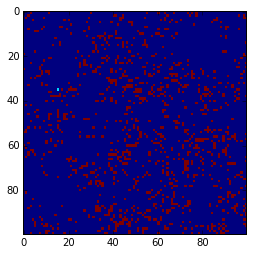

In [331]:
data=[[],[],[],[],[]]
image=[]
for x in range(xDim):
    image.append(list())
    for y in range(yDim):
        image[x].append(0)

#Here is how many rounds of behavior are occuring the If statement below defines when an antibiotic occurs in the system. 
for t in range(100):
    if t == 5 :
        for B in Bacteria_Total:
            B.antibiotic_state()
    count=[0,0,0,0,0]
    i=len(Bacteria_Total)-1
    while i > 0:
        Bacteria_Total[i].define_variables(list_of_values)
        Bacteria_Total[i].move_around(area)
        Bacteria_Total[i].replicate(area)
        Bacteria_Total[i].mutate(area)
        Bacteria_Total[i].transfer(area)
        Bacteria_Total[i].die(area)
        count[Bacteria_Total[i].state]=(count[Bacteria_Total[i].state])+1
        if Bacteria_Total[i].state != 4:
            try: 
                count[Bacteria_Total[i].oldstate]=count[Bacteria_Total[i].oldstate]-1 
            except AttributeError: 
                    pass 
        i=(i-1)
   
    for x in range(4):
        data[x].append(count[x])
        


for B in Bacteria_Total:
        if B.state != (4):
            image[B.x][B.y]=B.state
    
figure()
imshow(image,interpolation='nearest')

        
    

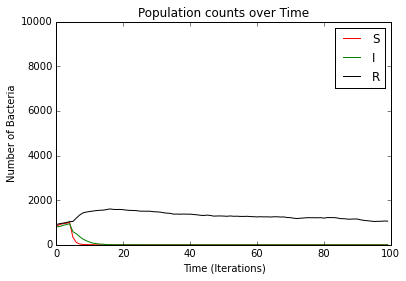

In [332]:
#plotting for the data above
for x in [0,1,2,3]:
    if x == 1:
        plot(data[1], 'r', label= Susceptible)
    if x == 2: 
        plot(data[2], 'g', label= Intermediate)
    if x == 3:
        plot(data[3], 'k', label= Resistant)
title("Population counts over Time")
xlabel("Time (Iterations)")
ylabel("Number of Bacteria")
xlim(0,100)
ylim(0,10000)
legend(('SIR'))

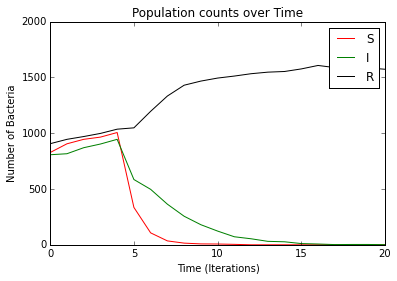

In [335]:
#A zoomed in version of the graph above
for x in [0,1,2,3]:
    if x == 1:
        plot(data[1], 'r', label= Susceptible)
    if x == 2: 
        plot(data[2], 'g', label= Intermediate)
    if x == 3:
        plot(data[3], 'k', label= Resistant)
title("Population counts over Time")
xlabel("Time (Iterations)")
ylabel("Number of Bacteria")
xlim(0,20)
ylim(0,2000)
legend(('SIR'))

The two above blocks shows the three populations after 100 iterations of the program. The second graph seen above shows at Iteration 5 how the Susceptible and Intermediate populations then behave. We also see a step-wise increase in the Resistant population. 

In [338]:
#Here we are testing the community after 50 interations the antibioitic is added
#Intialization 
Bacteria_Total=list()
for a in range(int(xDim*yDim*density_s)):
    (location_x),(location_y)=(get_random_location(area,xDim,yDim))
    S_Bacteria=Susceptible((area),(location_x),(location_y),(list_of_values),(False),(False))
    Bacteria_Total.append(S_Bacteria)
for a in range(int(xDim*yDim*density_i)):
    (location_x),(location_y)=(get_random_location(area,xDim,yDim))
    I_Bacteria=Intermediate((area),(location_x),(location_y),(list_of_values),(False),(False))
    Bacteria_Total.append(I_Bacteria)
for a in range(int(xDim*yDim*density_r)):
    (location_x),(location_y)=(get_random_location(area,xDim,yDim))
    R_Bacteria=Resistant((area),(location_x),(location_y),(list_of_values),(False),(False))
    Bacteria_Total.append(R_Bacteria)

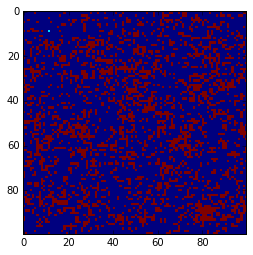

In [339]:
data=[[],[],[],[],[]]
image=[]
for x in range(xDim):
    image.append(list())
    for y in range(yDim):
        image[x].append(0)

#Here is how many rounds of behavior are occuring the If statement below defines when an antibiotic occurs in the system. 
for t in range(100):
    if t == 50 :
        for B in Bacteria_Total:
            B.antibiotic_state()
    count=[0,0,0,0,0]
    i=len(Bacteria_Total)-1
    while i > 0:
        Bacteria_Total[i].define_variables(list_of_values)
        Bacteria_Total[i].move_around(area)
        Bacteria_Total[i].replicate(area)
        Bacteria_Total[i].mutate(area)
        Bacteria_Total[i].transfer(area)
        Bacteria_Total[i].die(area)
        count[Bacteria_Total[i].state]=(count[Bacteria_Total[i].state])+1
        if Bacteria_Total[i].state != 4:
            try: 
                count[Bacteria_Total[i].oldstate]=count[Bacteria_Total[i].oldstate]-1 
            except AttributeError: 
                    pass 
        i=(i-1)
   
    for x in range(4):
        data[x].append(count[x])
        


for B in Bacteria_Total:
        if B.state != (4):
            image[B.x][B.y]=B.state
    
figure()
imshow(image,interpolation='nearest')

        
    

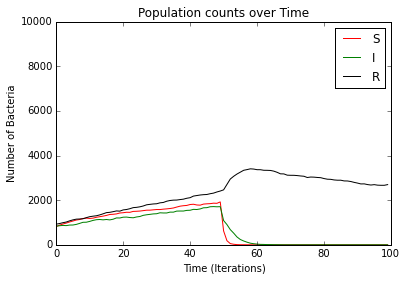

In [340]:
#Plot of the above data
for x in [0,1,2,3]:
    if x == 1:
        plot(data[1], 'r', label= Susceptible)
    if x == 2: 
        plot(data[2], 'g', label= Intermediate)
    if x == 3:
        plot(data[3], 'k', label= Resistant)
title("Population counts over Time")
xlabel("Time (Iterations)")
ylabel("Number of Bacteria")
xlim(0,100)
ylim(0,10000)
legend(('SIR'))

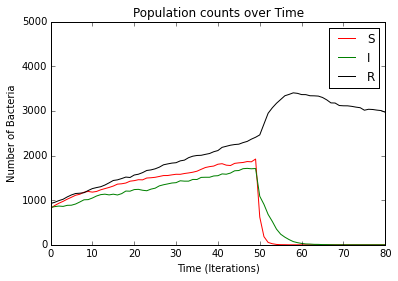

In [344]:
#A zoomed in version of the plot above
for x in [0,1,2,3]:
    if x == 1:
        plot(data[1], 'r', label= Susceptible)
    if x == 2: 
        plot(data[2], 'g', label= Intermediate)
    if x == 3:
        plot(data[3], 'k', label= Resistant)
title("Population counts over Time")
xlabel("Time (Iterations)")
ylabel("Number of Bacteria")
xlim(0,80)
ylim(0,5000)
legend(('SIR'))

The above to blocks show the when an anitbiotic is added to the system at a mid-point. 

In [347]:
#Testing late adminstration of an anitbiotic and measure community abundance 
#(similar to the three above, but at 95 iterations the antibiotic is added)
#Intialization 
Bacteria_Total=list()
for a in range(int(xDim*yDim*density_s)):
    (location_x),(location_y)=(get_random_location(area,xDim,yDim))
    S_Bacteria=Susceptible((area),(location_x),(location_y),(list_of_values),(False),(False))
    Bacteria_Total.append(S_Bacteria)
for a in range(int(xDim*yDim*density_i)):
    (location_x),(location_y)=(get_random_location(area,xDim,yDim))
    I_Bacteria=Intermediate((area),(location_x),(location_y),(list_of_values),(False),(False))
    Bacteria_Total.append(I_Bacteria)
for a in range(int(xDim*yDim*density_r)):
    (location_x),(location_y)=(get_random_location(area,xDim,yDim))
    R_Bacteria=Resistant((area),(location_x),(location_y),(list_of_values),(False),(False))
    Bacteria_Total.append(R_Bacteria)

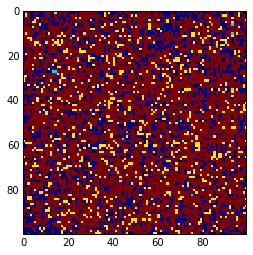

In [350]:
data=[[],[],[],[],[]]
image=[]
for x in range(xDim):
    image.append(list())
    for y in range(yDim):
        image[x].append(0)

#Here is how many rounds of behavior are occuring the If statement below defines when an antibiotic occurs in the system. 
for t in range(100):
    if t == 95 :
        for B in Bacteria_Total:
            B.antibiotic_state()
    count=[0,0,0,0,0]
    i=len(Bacteria_Total)-1
    while i > 0:
        Bacteria_Total[i].define_variables(list_of_values)
        Bacteria_Total[i].move_around(area)
        Bacteria_Total[i].replicate(area)
        Bacteria_Total[i].mutate(area)
        Bacteria_Total[i].transfer(area)
        Bacteria_Total[i].die(area)
        count[Bacteria_Total[i].state]=(count[Bacteria_Total[i].state])+1
        if Bacteria_Total[i].state != 4:
            try: 
                count[Bacteria_Total[i].oldstate]=count[Bacteria_Total[i].oldstate]-1 
            except AttributeError: 
                    pass 
        i=(i-1)
   
    for x in range(4):
        data[x].append(count[x])
        


for B in Bacteria_Total:
        if B.state != (4):
            image[B.x][B.y]=B.state
    
figure()
imshow(image,interpolation='nearest')

        
    

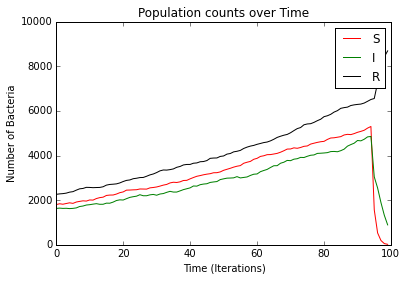

In [351]:
#Plotting data above
for x in [0,1,2,3]:
    if x == 1:
        plot(data[1], 'r', label= Susceptible)
    if x == 2: 
        plot(data[2], 'g', label= Intermediate)
    if x == 3:
        plot(data[3], 'k', label= Resistant)
title("Population counts over Time")
xlabel("Time (Iterations)")
ylabel("Number of Bacteria")
xlim(0,100)
ylim(0,10000)
legend(('SIR'))

Above shows the late antibiotic administration 